In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [467]:
# ----------初期値の設定----------

#年齢
start_age = 28 #才
end_work_age = 65 #才
end_age = 85 #才
#初期貯金額
start_money = 500 #万円
#年収関連
start_salary_original = 400 #万円
start_salary = start_salary_original * 0.75 #万円
salary_rate = 1.0 #%
retirement_allowance = 1500 #万円
#生活費
cost_of_living = 20 #万円
#教育費
education_per_child = 1600 #万円※子供一人につきかかる費用
number_of_child = 2 #人
first_child_age = 28 #自分が何歳の時、第1子が生まれるか
second_child_age = 31 #自分が何歳の時、第2子が生まれるか
#住宅ローン
down_payment = 500 #万円
selling_price = 4000 #万円
first_expense_rate = 6 #%
interest_rate = 1.4 #%
years = 35 #年
tax = 17 #万円


In [468]:

age, money_vs_age = [], []
salary = start_salary
money = start_money + salary

true_down_payment = down_payment - selling_price * first_expense_rate/100
borrowings = selling_price - true_down_payment
year_pay = borrowings/years

for i, j in enumerate(range(start_age, end_age)):
    if start_age <= j | j <= second_child_age+22:
        age.append(start_age + i)
        money_vs_age.append(money)
        salary = salary + salary*salary_rate/100
        borrowings = borrowings - year_pay
        rate_price = borrowings * interest_rate/100
        money = money + salary - cost_of_living*12 - 0.6144*i**2 - year_pay - rate_price
        
    elif second_child_age+22 < j | j < start_age + years:
        age.append(start_age + i)
        money_vs_age.append(money)
        salary = salary + salary*salary_rate/100
        borrowings = borrowings - year_pay
        rate_price = borrowings * interest_rate/100
        money = money + salary - cost_of_living*12 - year_pay - rate_price

    elif start_age + years <= j | j < 65:
        age.append(start_age + i)
        money_vs_age.append(money)
        salary = salary + salary*salary_rate/100
        money = money + salary - cost_of_living*12
    elif j == 65:
        age.append(start_age + i)
        money = money + retirement_allowance
        money_vs_age.append(money)
    elif end_work_age < j | j <= end_age:
        age.append(start_age + i)
        money = money - cost_of_living*12
        money_vs_age.append(money)
df = pd.DataFrame([age, money_vs_age], index=['age', 'money']).T

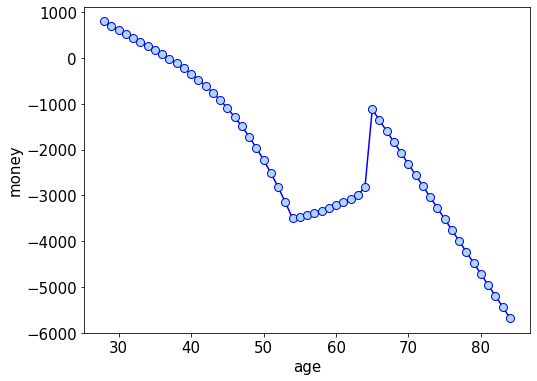

In [469]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
ax.plot(df.iloc[:,0], df.iloc[:,1], marker='o', color='blue', markerfacecolor='lightblue', markersize=8)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('money', fontsize=15)

plt.tick_params(labelsize=15)

In [470]:
#----------住宅ローン-----------#
age_living, money_living_vs_age = [], []
true_down_payment = down_payment - selling_price * first_expense_rate/100
borrowings = selling_price - true_down_payment
year_pay = borrowings/years
for i in range(0, end_age-start_age):
    age_living.append(start_age + i)
    if i < 35:
        rate_price = borrowings * interest_rate/100
        money_living = year_pay + rate_price + tax
        money_living_vs_age.append(money_living)
    else:
        money_living_vs_age.append(0)

df_living = pd.DataFrame([age_living, money_living_vs_age], index=['age', 'money']).T

#----------教育費-----------#
age_education, money_education_vs_age = [], []
education_year = 22 + second_child_age - first_child_age
a = education_per_child*number_of_child*3/education_year**3
for i in range(0, end_age-start_age):
    age_education.append(start_age + i)
    if i <= education_year:
        money_education = a * i**2
        money_education_vs_age.append(money_education)
    else:
        money_education_vs_age.append(0)
df_education = pd.DataFrame([age_education, money_education_vs_age], index=['age', 'money']).T 

#----------生活費-----------#
age_routine, money_routine_vs_age = [], []
for i in range(0, end_age-start_age):
    age_routine.append(start_age + i)
    money_routine_vs_age.append(cost_of_living*12)
df_routine = pd.DataFrame([age_routine, money_routine_vs_age], index=['age', 'money']).T 

In [471]:
df_all_spending = df_living + df_education + df_routine
df_all_spending.iloc[:,0] = df_all_spending.iloc[:,0]/3

In [472]:
#----------所得分-----------#
age_salary, money_salary_vs_age = [], []
salary = start_salary
money = start_money + salary

for i, j in enumerate(range(start_age, end_age)):
    if start_age <= j | j < 65:
        age_salary.append(start_age + i)
        salary = salary + salary*salary_rate/100
        money = money + salary - df_all_spending.iloc[i,1]
        money_salary_vs_age.append(money)
    elif j == 65:
        age_salary.append(start_age + i)
        money = money + retirement_allowance - df_all_spending.iloc[i,1]
        money_salary_vs_age.append(money)
    elif end_work_age < j | j <= end_age:
        age_salary.append(start_age + i)
        money = money - df_all_spending.iloc[i,1]
        money_salary_vs_age.append(money)
df = pd.DataFrame([age_salary, money_salary_vs_age], index=['age', 'money']).T

In [474]:
df.head(1)

,age,money
0,28.0,686.782857


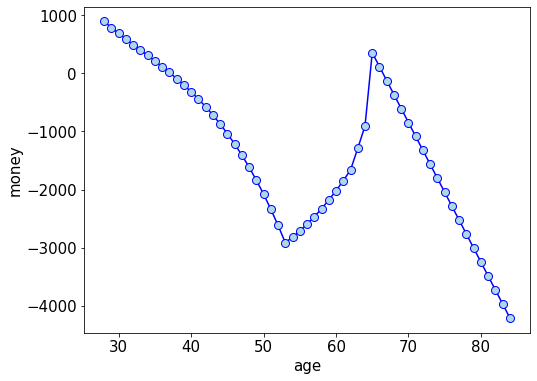

In [449]:
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
ax.plot(df.iloc[:,0], df.iloc[:,1], marker='o', color='blue', markerfacecolor='lightblue', markersize=8)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('money', fontsize=15)

plt.tick_params(labelsize=15)